# **1. Perkenalan Dataset**

## **Heart Disease Dataset (Cleveland)**

Dataset yang digunakan dalam eksperimen ini adalah **Heart Disease Dataset** dari **UCI Machine Learning Repository**. Dataset ini merupakan salah satu dataset medis yang paling populer untuk klasifikasi penyakit jantung.

### **Deskripsi Dataset:**
- **Sumber**: UCI Machine Learning Repository - Cleveland Heart Disease Database
- **URL**: https://archive.ics.uci.edu/ml/datasets/heart+Disease
- **Jumlah Sampel**: 303 pasien
- **Jumlah Fitur**: 13 fitur medis + 1 target variable
- **Tipe Problem**: Binary Classification (Ada penyakit jantung atau tidak)
- **Target Variable**:
  - `0` = No disease (Tidak ada penyakit jantung)
  - `1` = Disease present (Ada penyakit jantung)

### **Fitur-Fitur dalam Dataset:**

1. **age**: Usia pasien (dalam tahun)
2. **sex**: Jenis kelamin (1 = laki-laki, 0 = perempuan)
3. **cp**: Tipe nyeri dada (chest pain type)
   - 0: Typical angina
   - 1: Atypical angina
   - 2: Non-anginal pain
   - 3: Asymptomatic
4. **trestbps**: Tekanan darah saat istirahat (mm Hg)
5. **chol**: Kolesterol serum (mg/dl)
6. **fbs**: Gula darah puasa > 120 mg/dl (1 = true, 0 = false)
7. **restecg**: Hasil elektrokardiografi saat istirahat
   - 0: Normal
   - 1: Abnormalitas gelombang ST-T
   - 2: Left ventricular hypertrophy
8. **thalach**: Denyut jantung maksimum yang dicapai
9. **exang**: Exercise induced angina (1 = yes, 0 = no)
10. **oldpeak**: ST depression induced by exercise relative to rest
11. **slope**: Kemiringan segmen ST saat exercise
    - 0: Upsloping
    - 1: Flat
    - 2: Downsloping
12. **ca**: Jumlah pembuluh darah utama (0-3) yang diwarnai fluoroscopy
13. **thal**: Thalassemia
    - 1: Normal
    - 2: Fixed defect
    - 3: Reversible defect

### **Tujuan Eksperimen:**
Membangun model machine learning untuk **memprediksi apakah seseorang memiliki penyakit jantung atau tidak** berdasarkan 13 fitur medis di atas.

### **Kenapa Dataset Ini Dipilih?**
- Dataset medis yang memiliki aplikasi real-world yang penting
- Ukuran dataset moderat (303 samples) - cocok untuk eksperimen
- Binary classification - problem klasik yang mudah dipahami
- Memiliki missing values - memberikan kesempatan untuk praktik data cleaning
- Tersedia secara publik di UCI ML Repository


# **2. Import Library**

Library yang digunakan mencakup pandas untuk manipulasi data, numpy untuk operasi numerik, matplotlib dan seaborn untuk visualisasi, serta scikit-learn untuk preprocessing dan modeling.


In [1]:
# Import library untuk data manipulation dan analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import library untuk preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Import library untuk modeling
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Import library untuk evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Import library untuk saving model
import joblib
import pickle
import os

# Set style untuk visualisasi
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


# **3. Memuat Dataset**

Dataset Heart Disease akan dimuat langsung dari UCI ML Repository menggunakan pandas. Data akan diload dengan handling missing values (yang ditandai dengan '?'), kemudian dilakukan konversi target menjadi binary classification untuk memudahkan pemodelan.


In [3]:
import pandas as pd
import os

# Load dataset dari file yang sudah ada
df = pd.read_csv('/content/heart_disease_raw.csv')

# Convert target menjadi binary classification jika belum
# 0 = no disease, 1-4 = disease present -> 0 = no disease, 1 = disease
df['target'] = (df['target'] > 0).astype(int)

print("="*70)
print("HEART DISEASE DATASET - LOADING")
print("="*70)
print(f"\n📊 Dataset Shape: {df.shape}")
print(f"📝 Number of samples: {df.shape[0]}")
print(f"📝 Number of features: {df.shape[1] - 1} (+ 1 target)")
print("\n✅ Dataset loaded successfully!")

HEART DISEASE DATASET - LOADING

📊 Dataset Shape: (303, 14)
📝 Number of samples: 303
📝 Number of features: 13 (+ 1 target)

✅ Dataset loaded successfully!


### 3.1 Informasi Dasar Dataset

In [4]:
# Tampilkan informasi dasar dataset
print("="*70)
print("DATASET INFORMATION")
print("="*70)
print("\nColumn Names & Data Types:")
print(df.dtypes)
print(f"\nDataset Shape: {df.shape}")
print(f"Total Rows: {len(df)}")
print(f"Total Columns: {len(df.columns)}")
print(f"\nColumn Names: {list(df.columns)}")

DATASET INFORMATION

Column Names & Data Types:
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target        int64
dtype: object

Dataset Shape: (303, 14)
Total Rows: 303
Total Columns: 14

Column Names: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


### 3.2 Distribusi Target Variable

TARGET VARIABLE DISTRIBUTION

Target Value Counts:
target
0    164
1    139
Name: count, dtype: int64

   - Class 0 (No Disease): 164 patients (54.1%)
   - Class 1 (Disease):    139 patients (45.9%)


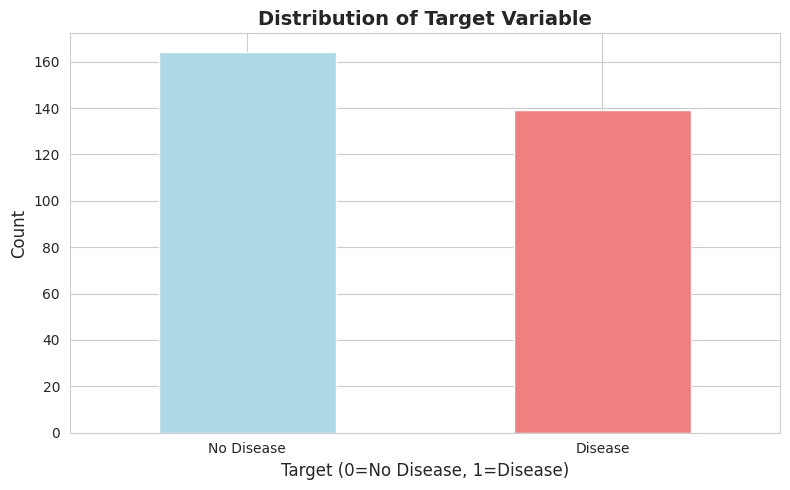

In [5]:
# Analisis distribusi target variable
print("="*70)
print("TARGET VARIABLE DISTRIBUTION")
print("="*70)
print("\nTarget Value Counts:")
print(df['target'].value_counts().sort_index())

print(f"\n   - Class 0 (No Disease): {(df['target']==0).sum()} patients ({(df['target']==0).sum()/len(df)*100:.1f}%)")
print(f"   - Class 1 (Disease):    {(df['target']==1).sum()} patients ({(df['target']==1).sum()/len(df)*100:.1f}%)")

# Visualisasi distribusi target
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
df['target'].value_counts().plot(kind='bar', color=['lightblue', 'lightcoral'])
plt.title('Distribution of Target Variable', fontsize=14, fontweight='bold')
plt.xlabel('Target (0=No Disease, 1=Disease)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['No Disease', 'Disease'], rotation=0)
plt.tight_layout()
plt.show()

### 3.3 Preview Data (Head & Tail)

In [6]:
# Tampilkan 5 baris pertama
print("="*70)
print("FIRST 5 ROWS OF DATASET")
print("="*70)
df.head()

FIRST 5 ROWS OF DATASET


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


# **4. Exploratory Data Analysis (EDA)**

Exploratory Data Analysis dilakukan untuk memahami karakteristik dataset secara mendalam. Tahap ini mencakup analisis statistik deskriptif, distribusi data, korelasi antar fitur, deteksi outlier, dan hubungan fitur dengan target variable. EDA sangat penting untuk menentukan langkah preprocessing yang tepat dan memahami pola dalam data.


INFORMASI DASAR DATASET - HEART DISEASE
Jumlah Baris: 303
Jumlah Kolom: 14

Nama Kolom:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

Tipe Data:
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target        int64
dtype: object

STATISTIK DESKRIPTIF


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000



MISSING VALUES
      Missing Count  Percentage
ca                4    1.320132
thal              2    0.660066

⚠️ Total missing values: 6

DUPLIKASI DATA
Jumlah data duplikat: 0
Persentase duplikasi: 0.00%

DISTRIBUSI TARGET VARIABLE (HEART DISEASE)
target
0    164
1    139
Name: count, dtype: int64


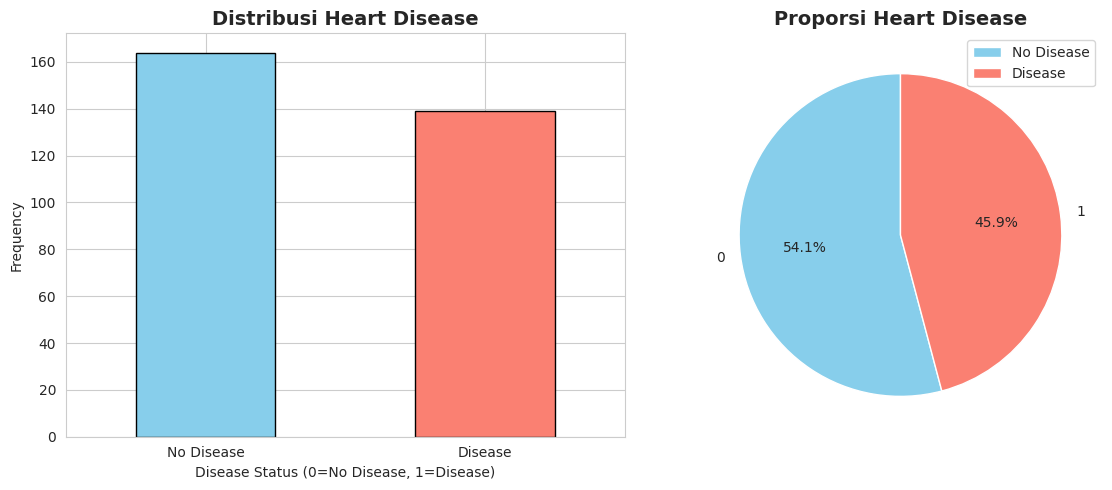


DISTRIBUSI FITUR NUMERIK


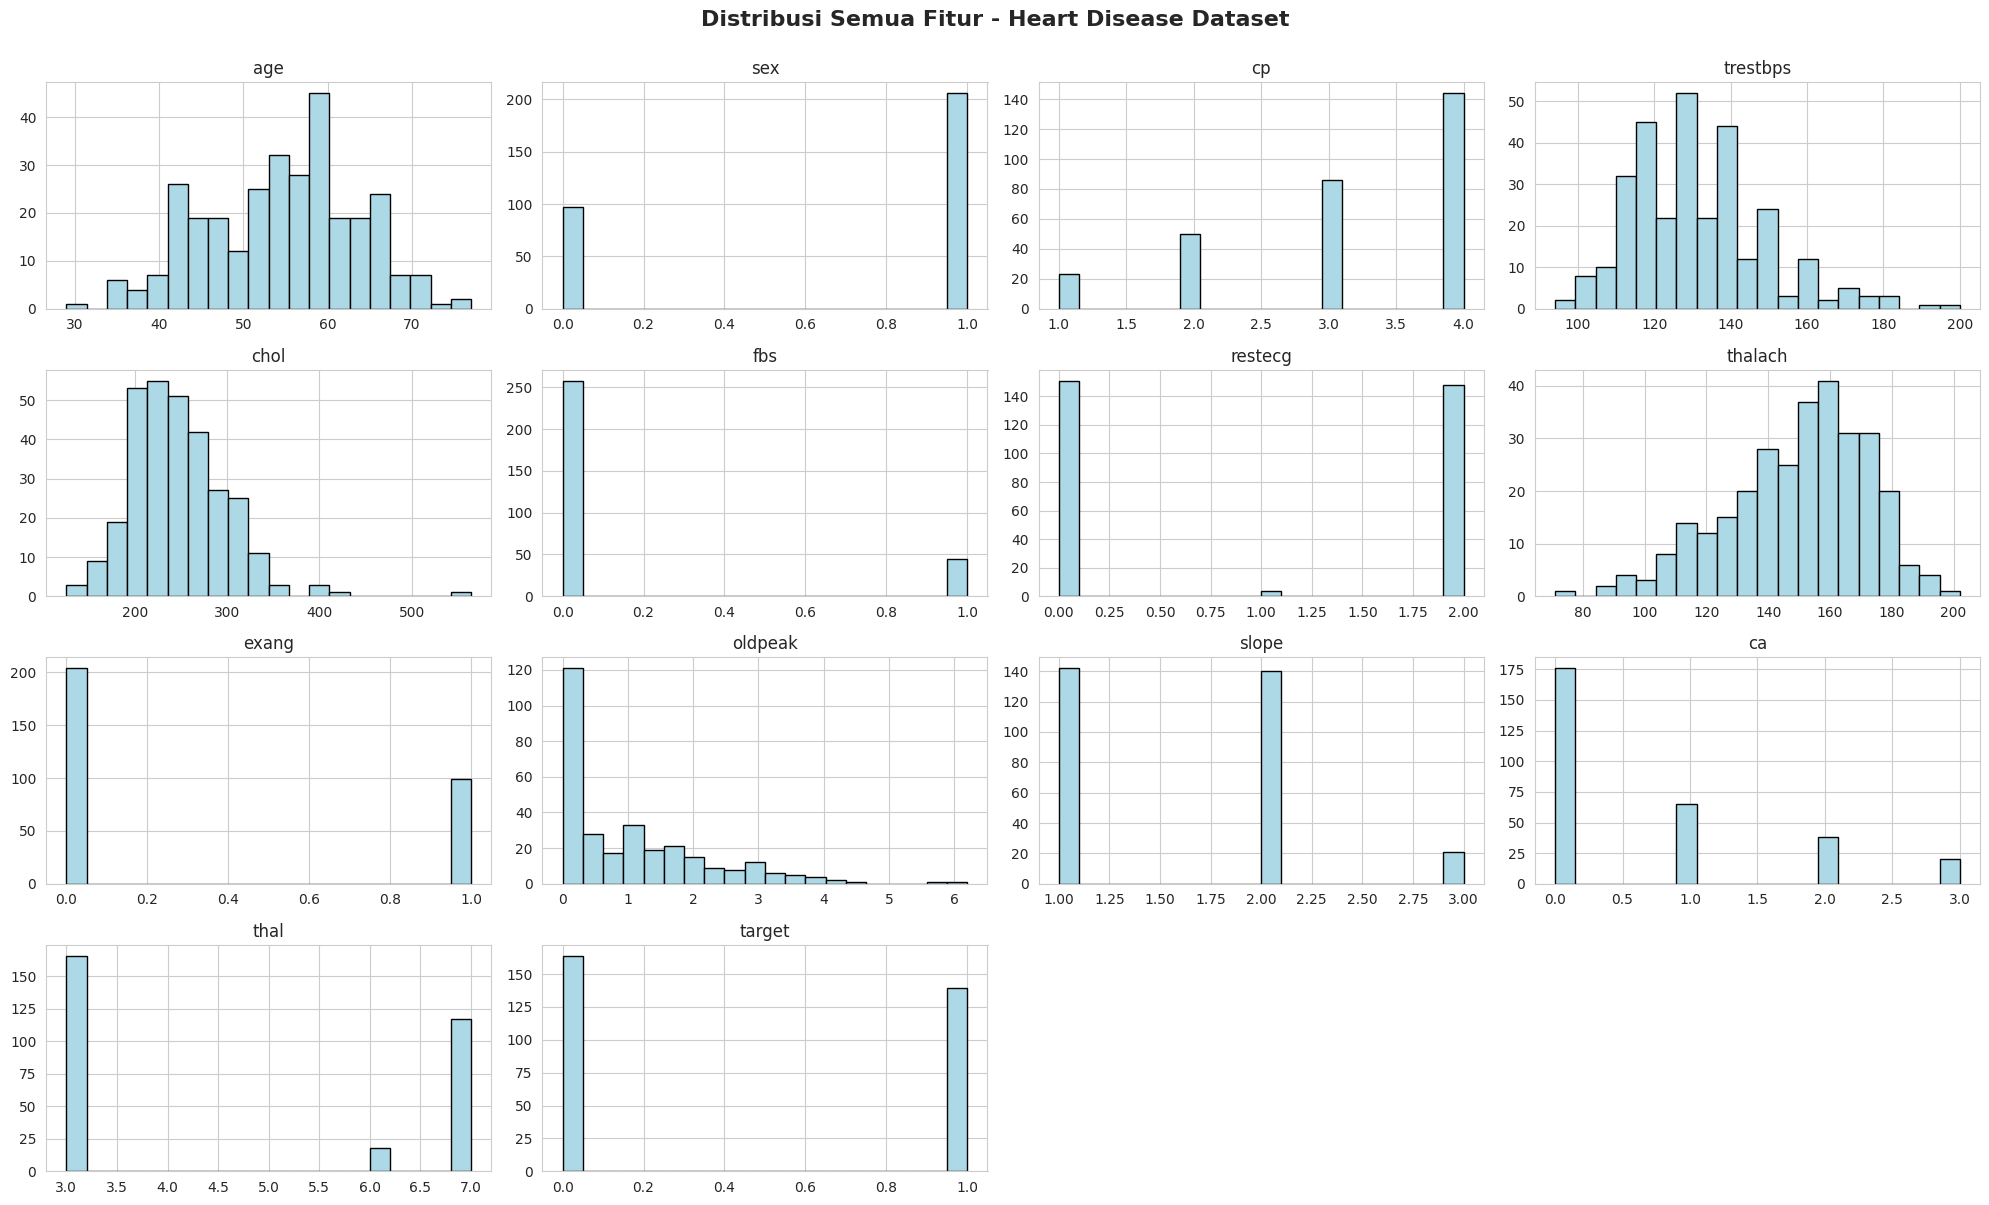


CORRELATION MATRIX


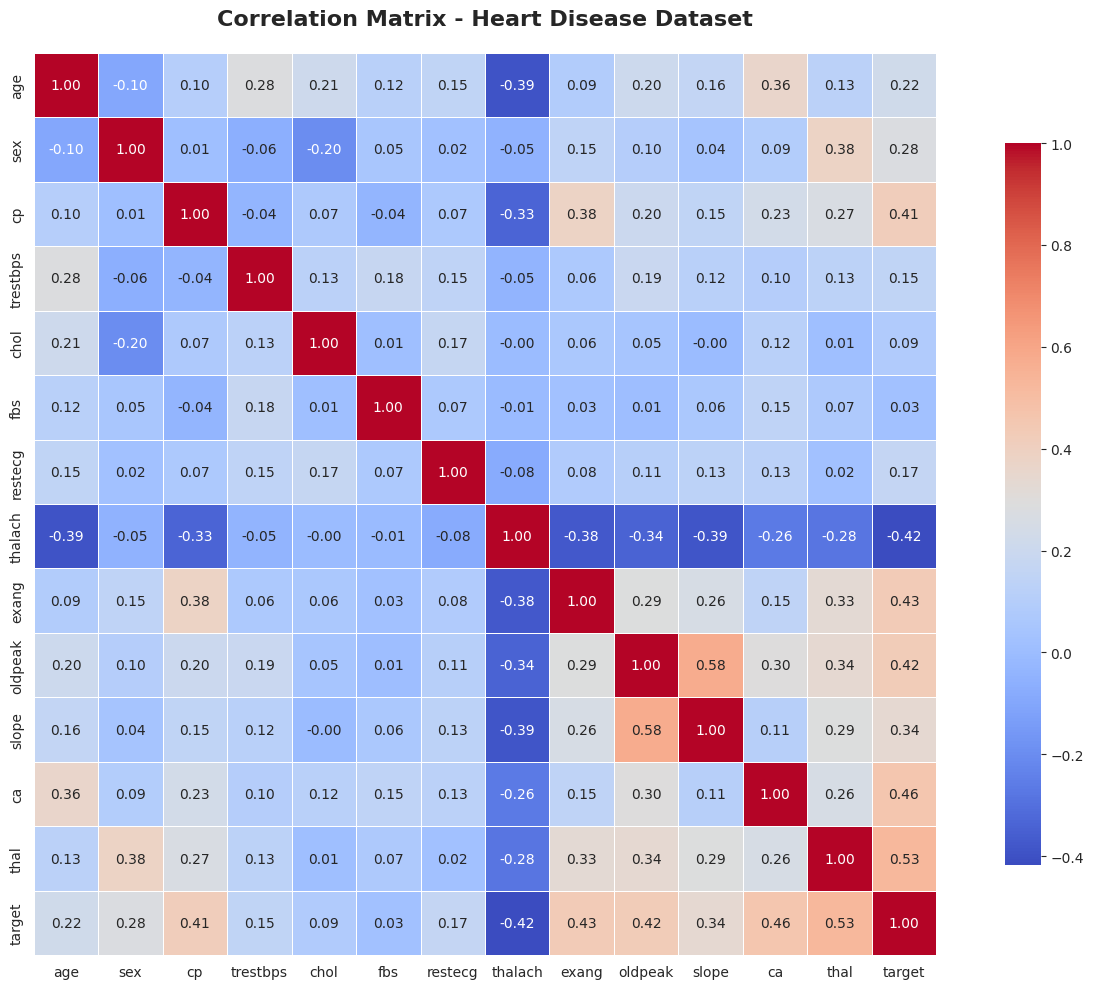


Korelasi dengan Target (Heart Disease) - diurutkan:
target      1.000000
thal        0.525689
ca          0.460442
exang       0.431894
oldpeak     0.424510
cp          0.414446
slope       0.339213
sex         0.276816
age         0.223120
restecg     0.169202
trestbps    0.150825
chol        0.085164
fbs         0.025264
thalach    -0.417167
Name: target, dtype: float64

OUTLIER DETECTION


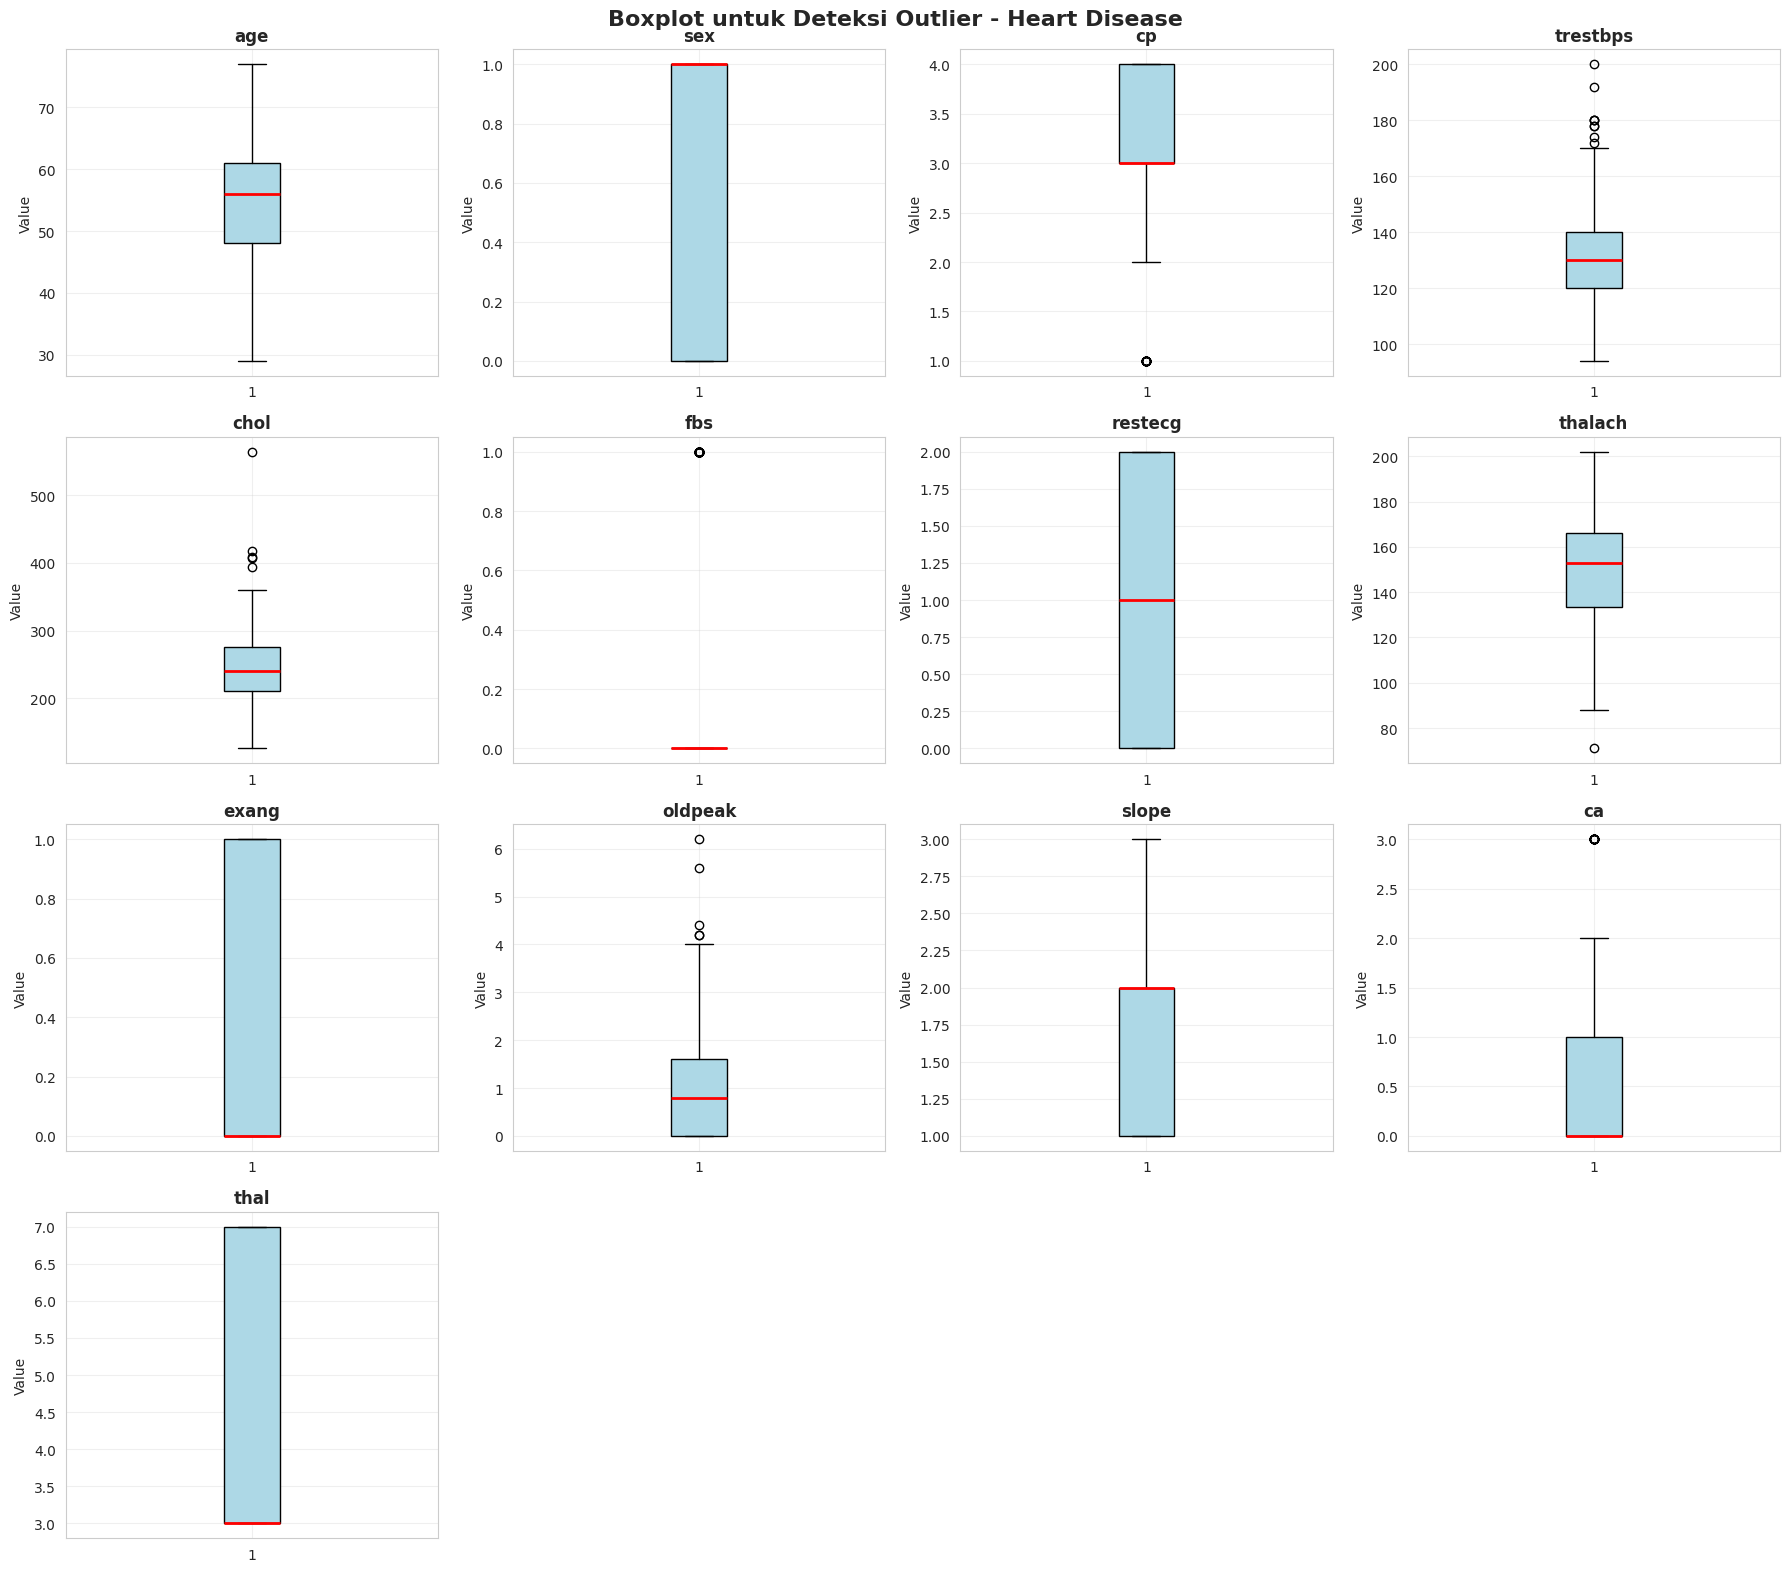


RELATIONSHIP FITUR DENGAN TARGET (HEART DISEASE)
Top 4 features dengan korelasi tertinggi: ['thal', 'ca', 'exang', 'oldpeak']


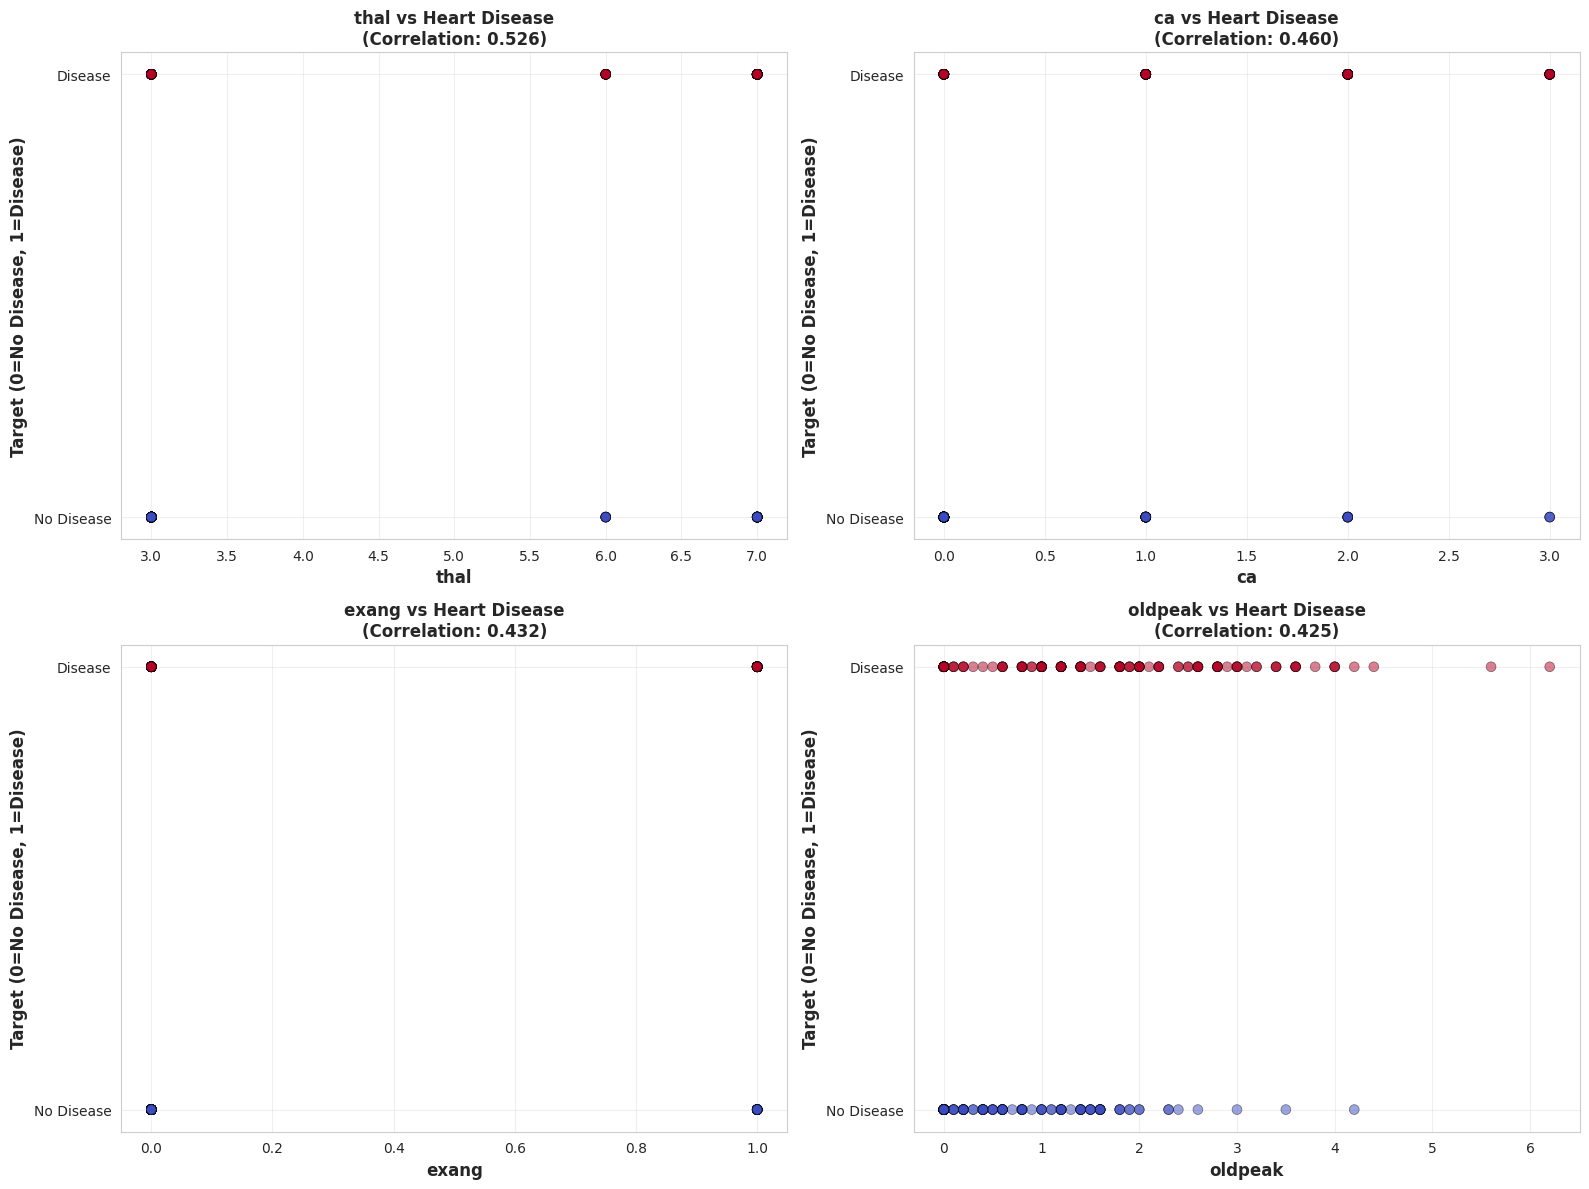


✅ Exploratory Data Analysis completed!


In [7]:
# ========================================
# 4.1 Informasi Dasar Dataset
# ========================================
print("="*60)
print("INFORMASI DASAR DATASET - HEART DISEASE")
print("="*60)
print(f"Jumlah Baris: {df.shape[0]}")
print(f"Jumlah Kolom: {df.shape[1]}")
print(f"\nNama Kolom:\n{df.columns.tolist()}")
print(f"\nTipe Data:\n{df.dtypes}")

# ========================================
# 4.2 Statistik Deskriptif
# ========================================
print("\n" + "="*60)
print("STATISTIK DESKRIPTIF")
print("="*60)
display(df.describe())

# ========================================
# 4.3 Cek Missing Values
# ========================================
print("\n" + "="*60)
print("MISSING VALUES")
print("="*60)
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percentage
})
print(missing_df[missing_df['Missing Count'] > 0])
if missing_df['Missing Count'].sum() == 0:
    print("✅ Tidak ada missing values!")
else:
    print(f"\n⚠️ Total missing values: {missing_df['Missing Count'].sum()}")

# ========================================
# 4.4 Cek Duplikasi Data
# ========================================
print("\n" + "="*60)
print("DUPLIKASI DATA")
print("="*60)
duplicates = df.duplicated().sum()
print(f"Jumlah data duplikat: {duplicates}")
print(f"Persentase duplikasi: {(duplicates/len(df)*100):.2f}%")

# ========================================
# 4.5 Distribusi Target Variable (Heart Disease)
# ========================================
print("\n" + "="*60)
print("DISTRIBUSI TARGET VARIABLE (HEART DISEASE)")
print("="*60)
print(df['target'].value_counts().sort_index())

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df['target'].value_counts().sort_index().plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')
plt.title('Distribusi Heart Disease', fontsize=14, fontweight='bold')
plt.xlabel('Disease Status (0=No Disease, 1=Disease)')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.xticks([0, 1], ['No Disease', 'Disease'])

plt.subplot(1, 2, 2)
df['target'].value_counts().sort_index().plot(kind='pie', autopct='%1.1f%%', startangle=90,
                                              colors=['skyblue', 'salmon'])
plt.title('Proporsi Heart Disease', fontsize=14, fontweight='bold')
plt.ylabel('')
plt.legend(['No Disease', 'Disease'], loc='best')
plt.tight_layout()
plt.show()

# ========================================
# 4.6 Distribusi Fitur Numerik
# ========================================
print("\n" + "="*60)
print("DISTRIBUSI FITUR NUMERIK")
print("="*60)

# Visualisasi histogram untuk semua fitur
df.hist(bins=20, figsize=(20, 12), edgecolor='black', color='lightblue')
plt.suptitle('Distribusi Semua Fitur - Heart Disease Dataset', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

# ========================================
# 4.7 Correlation Matrix
# ========================================
print("\n" + "="*60)
print("CORRELATION MATRIX")
print("="*60)

plt.figure(figsize=(14, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Heart Disease Dataset', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Korelasi dengan target variable
print("\nKorelasi dengan Target (Heart Disease) - diurutkan:")
target_corr = correlation_matrix['target'].sort_values(ascending=False)
print(target_corr)

# ========================================
# 4.8 Outlier Detection dengan Boxplot
# ========================================
print("\n" + "="*60)
print("OUTLIER DETECTION")
print("="*60)

features = df.columns[:-1]  # Semua kolom kecuali target
fig, axes = plt.subplots(4, 4, figsize=(18, 16))
axes = axes.ravel()

for idx, col in enumerate(features):
    if idx < len(axes):
        axes[idx].boxplot(df[col].dropna(), vert=True, patch_artist=True,
                         boxprops=dict(facecolor='lightblue', color='black'),
                         medianprops=dict(color='red', linewidth=2))
        axes[idx].set_title(f'{col}', fontweight='bold')
        axes[idx].set_ylabel('Value')
        axes[idx].grid(True, alpha=0.3)

# Hide extra subplots
for idx in range(len(features), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Boxplot untuk Deteksi Outlier - Heart Disease', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# ========================================
# 4.9 Relationship antara Fitur dengan Target
# ========================================
print("\n" + "="*60)
print("RELATIONSHIP FITUR DENGAN TARGET (HEART DISEASE)")
print("="*60)

# Pilih 4 fitur dengan korelasi tertinggi (exclude target itu sendiri)
top_features = target_corr[1:5].index.tolist()
print(f"Top 4 features dengan korelasi tertinggi: {top_features}")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for idx, feature in enumerate(top_features):
    axes[idx].scatter(df[feature], df['target'], alpha=0.5, c=df['target'],
                     cmap='coolwarm', edgecolors='black', linewidth=0.5, s=50)
    axes[idx].set_xlabel(feature, fontweight='bold', fontsize=12)
    axes[idx].set_ylabel('Target (0=No Disease, 1=Disease)', fontweight='bold', fontsize=12)
    axes[idx].set_title(f'{feature} vs Heart Disease\n(Correlation: {target_corr[feature]:.3f})',
                       fontweight='bold', fontsize=12)
    axes[idx].set_yticks([0, 1])
    axes[idx].set_yticklabels(['No Disease', 'Disease'])
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Exploratory Data Analysis completed!")


# **5. Data Preprocessing**

Data preprocessing merupakan langkah krusial untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering mengandung missing values, duplikasi, atau rentang nilai yang tidak konsisten. Proses ini bertujuan membersihkan dan mempersiapkan data agar siap untuk pemodelan.

Tahapan preprocessing yang dilakukan meliputi:
1. **Handling Missing Values** - Mengisi nilai yang hilang dengan strategi median imputation
2. **Removing Duplicates** - Menghapus data duplikat untuk menghindari bias
3. **Feature Scaling** - Standardisasi fitur menggunakan StandardScaler
4. **Train-Test Split** - Membagi data dengan stratified sampling untuk menjaga proporsi kelas
5. **Data Saving** - Menyimpan data yang sudah diproses untuk tahap modeling

Setiap langkah disesuaikan dengan karakteristik dataset Heart Disease yang merupakan data terstruktur dengan fitur numerik.


STEP 1: HANDLING MISSING VALUES
Missing values sebelum handling:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

Kolom dengan missing values: ['ca', 'thal']

✅ Missing values telah diisi dengan median

Missing values setelah handling:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

STEP 2: HANDLING DUPLICATE DATA
Jumlah data sebelum menghapus duplikat: 303
Jumlah data setelah menghapus duplikat: 303
Jumlah duplikat yang dihapus: 0

STEP 3: DISTRIBUSI TARGET VARIABLE
Distribusi Heart Disease (Binary Classification):
target
0    164
1    139
Name: count, dtype: int64

Class Balance:
  - No Disease (0): 164 (54.1%)
  - Disease (1):    139 (45.9%)


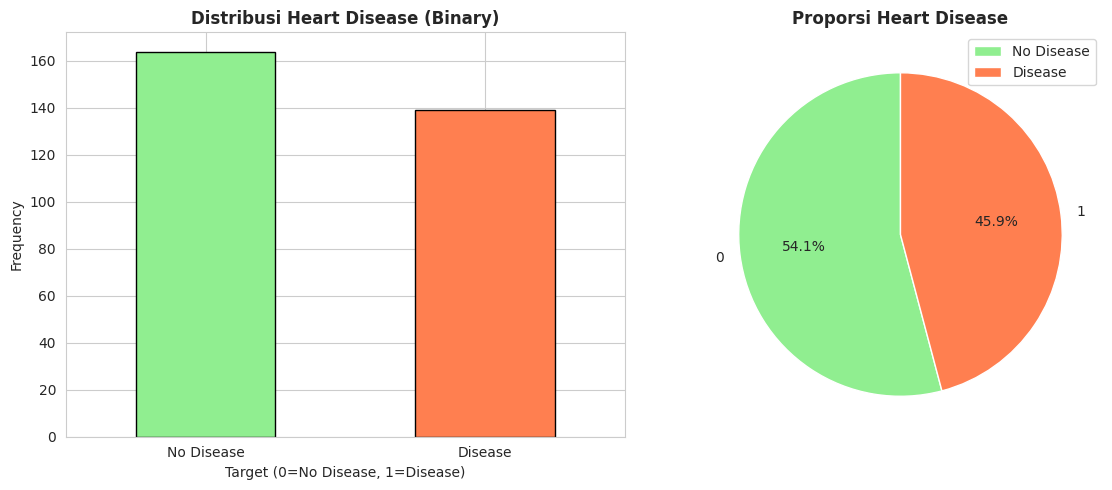


STEP 4: FEATURE SCALING (STANDARDIZATION)
Shape of Features (X): (303, 13)
Shape of Target (y): (303,)

Features: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

Target distribution:
target
0    164
1    139
Name: count, dtype: int64

✅ Features scaled successfully!

Statistik setelah scaling (mean ≈ 0, std ≈ 1):


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02
mean,-1.465641e-18,-2.931282e-17,-1.670831e-16,4.426236e-16,2.345026e-16,-1.172513e-17,-1.172513e-17,-1.172513e-16,-9.086974e-17,2.345026e-17,1.436328e-16,-4.690051e-17,1.348390e-16
std,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00
min,-2.819115e+00,-1.457296e+00,-2.251775e+00,-2.145037e+00,-2.334877e+00,-4.176345e-01,-9.967493e-01,-3.442067e+00,-6.966305e-01,-8.968617e-01,-9.763521e-01,-7.111314e-01,-8.902381e-01
25%,-7.135564e-01,-1.457296e+00,-1.652679e-01,-6.652997e-01,-6.905030e-01,-4.176345e-01,-9.967493e-01,-7.053073e-01,-6.966305e-01,-8.968617e-01,-9.763521e-01,-7.111314e-01,-8.902381e-01
50%,1.729945e-01,6.862024e-01,-1.652679e-01,-9.616980e-02,-1.101357e-01,-4.176345e-01,9.967493e-03,1.485618e-01,-6.966305e-01,-2.067053e-01,6.491132e-01,-7.111314e-01,-8.902381e-01
75%,7.270888e-01,6.862024e-01,8.779855e-01,4.729601e-01,5.476139e-01,-4.176345e-01,1.016684e+00,7.178079e-01,1.435481e+00,4.834512e-01,6.491132e-01,3.608726e-01,1.176752e+00
max,2.500191e+00,6.862024e-01,8.779855e-01,3.887739e+00,6.138485e+00,2.394438e+00,1.016684e+00,2.294182e+00,1.435481e+00,4.451851e+00,2.274579e+00,2.504881e+00,1.176752e+00


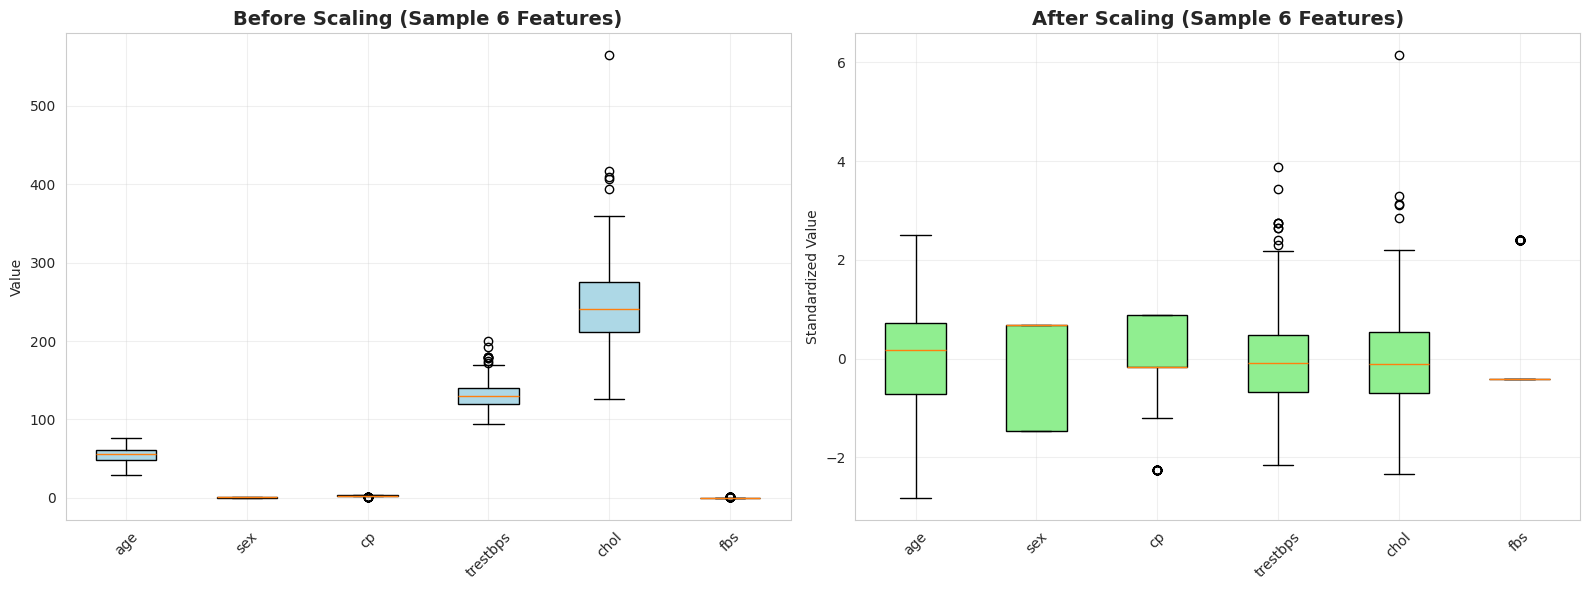


STEP 5: TRAIN-TEST SPLIT (STRATIFIED)
Training set size: 242 samples (79.9%)
Testing set size: 61 samples (20.1%)

Target distribution in training set:
target
0    131
1    111
Name: count, dtype: int64
  - No Disease: 131 (54.1%)
  - Disease:    111 (45.9%)

Target distribution in testing set:
target
0    33
1    28
Name: count, dtype: int64
  - No Disease: 33 (54.1%)
  - Disease:    28 (45.9%)

STEP 6: SAVE PREPROCESSED DATA
✅ Preprocessed data saved successfully!
  - Train data: data/preprocessed/train_data.csv
    Shape: (242, 14), Size: 60.45 KB
  - Test data: data/preprocessed/test_data.csv
    Shape: (61, 14), Size: 15.28 KB
  - Scaler: data/preprocessed/scaler.pkl

PREPROCESSING SUMMARY - HEART DISEASE DATASET
✅ Original data: 303 samples
✅ After handling missing values: 303 samples
✅ After removing duplicates: 303 samples
✅ Training samples: 242 (79.9%)
✅ Testing samples: 61 (20.1%)
✅ Number of features: 13
✅ Number of classes: 2 (Binary Classification)
✅ Feature scaling: Sta

In [8]:
# ========================================
# 5.1 Handling Missing Values
# ========================================
print("="*60)
print("STEP 1: HANDLING MISSING VALUES")
print("="*60)
print(f"Missing values sebelum handling:")
print(df.isnull().sum())

# Impute missing values dengan median untuk kolom numerik
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

# Get columns with missing values
cols_with_missing = df.columns[df.isnull().any()].tolist()
print(f"\nKolom dengan missing values: {cols_with_missing}")

if cols_with_missing:
    df[cols_with_missing] = imputer.fit_transform(df[cols_with_missing])
    print(f"\n✅ Missing values telah diisi dengan median")
else:
    print("\n✅ Tidak ada missing values")

print(f"\nMissing values setelah handling:")
print(df.isnull().sum())

# ========================================
# 5.2 Handling Duplicate Data
# ========================================
print("\n" + "="*60)
print("STEP 2: HANDLING DUPLICATE DATA")
print("="*60)
print(f"Jumlah data sebelum menghapus duplikat: {len(df)}")
df_clean = df.drop_duplicates()
print(f"Jumlah data setelah menghapus duplikat: {len(df_clean)}")
print(f"Jumlah duplikat yang dihapus: {len(df) - len(df_clean)}")

# ========================================
# 5.3 Visualisasi Distribusi Target
# ========================================
print("\n" + "="*60)
print("STEP 3: DISTRIBUSI TARGET VARIABLE")
print("="*60)
print("Distribusi Heart Disease (Binary Classification):")
print(df_clean['target'].value_counts().sort_index())
print(f"\nClass Balance:")
print(f"  - No Disease (0): {(df_clean['target']==0).sum()} ({(df_clean['target']==0).sum()/len(df_clean)*100:.1f}%)")
print(f"  - Disease (1):    {(df_clean['target']==1).sum()} ({(df_clean['target']==1).sum()/len(df_clean)*100:.1f}%)")

# Visualisasi
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df_clean['target'].value_counts().sort_index().plot(kind='bar', color=['lightgreen', 'coral'], edgecolor='black')
plt.title('Distribusi Heart Disease (Binary)', fontweight='bold')
plt.xlabel('Target (0=No Disease, 1=Disease)')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['No Disease', 'Disease'], rotation=0)

plt.subplot(1, 2, 2)
df_clean['target'].value_counts().sort_index().plot(kind='pie', autopct='%1.1f%%',
                                                     colors=['lightgreen', 'coral'], startangle=90)
plt.title('Proporsi Heart Disease', fontweight='bold')
plt.ylabel('')
plt.legend(['No Disease', 'Disease'], loc='best')
plt.tight_layout()
plt.show()

# ========================================
# 5.4 Feature Scaling - Standardization
# ========================================
print("\n" + "="*60)
print("STEP 4: FEATURE SCALING (STANDARDIZATION)")
print("="*60)

# Pisahkan features dan target
X = df_clean.drop('target', axis=1)
y = df_clean['target']

print(f"Shape of Features (X): {X.shape}")
print(f"Shape of Target (y): {y.shape}")
print(f"\nFeatures: {X.columns.tolist()}")
print(f"\nTarget distribution:\n{y.value_counts().sort_index()}")

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

print("\n✅ Features scaled successfully!")
print("\nStatistik setelah scaling (mean ≈ 0, std ≈ 1):")
display(X_scaled_df.describe())

# Visualisasi perbandingan sebelum dan sesudah scaling
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Before scaling
axes[0].boxplot([X[col] for col in X.columns[:6]], labels=X.columns[:6], patch_artist=True,
                boxprops=dict(facecolor='lightblue'))
axes[0].set_title('Before Scaling (Sample 6 Features)', fontweight='bold', fontsize=14)
axes[0].set_ylabel('Value')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3)

# After scaling
axes[1].boxplot([X_scaled_df[col] for col in X_scaled_df.columns[:6]], labels=X_scaled_df.columns[:6],
                patch_artist=True, boxprops=dict(facecolor='lightgreen'))
axes[1].set_title('After Scaling (Sample 6 Features)', fontweight='bold', fontsize=14)
axes[1].set_ylabel('Standardized Value')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ========================================
# 5.5 Train-Test Split
# ========================================
print("\n" + "="*60)
print("STEP 5: TRAIN-TEST SPLIT (STRATIFIED)")
print("="*60)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Testing set size: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"\nTarget distribution in training set:")
print(y_train.value_counts().sort_index())
print(f"  - No Disease: {(y_train==0).sum()} ({(y_train==0).sum()/len(y_train)*100:.1f}%)")
print(f"  - Disease:    {(y_train==1).sum()} ({(y_train==1).sum()/len(y_train)*100:.1f}%)")
print(f"\nTarget distribution in testing set:")
print(y_test.value_counts().sort_index())
print(f"  - No Disease: {(y_test==0).sum()} ({(y_test==0).sum()/len(y_test)*100:.1f}%)")
print(f"  - Disease:    {(y_test==1).sum()} ({(y_test==1).sum()/len(y_test)*100:.1f}%)")

# ========================================
# 5.6 Save Preprocessed Data
# ========================================
print("\n" + "="*60)
print("STEP 6: SAVE PREPROCESSED DATA")
print("="*60)

os.makedirs('data/preprocessed', exist_ok=True)

# Gabungkan kembali X dan y untuk disimpan
train_data = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)
test_data = pd.concat([X_test.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)

train_data.to_csv('data/preprocessed/train_data.csv', index=False)
test_data.to_csv('data/preprocessed/test_data.csv', index=False)

# Simpan scaler
joblib.dump(scaler, 'data/preprocessed/scaler.pkl')

print("✅ Preprocessed data saved successfully!")
print(f"  - Train data: data/preprocessed/train_data.csv")
print(f"    Shape: {train_data.shape}, Size: {os.path.getsize('data/preprocessed/train_data.csv')/1024:.2f} KB")
print(f"  - Test data: data/preprocessed/test_data.csv")
print(f"    Shape: {test_data.shape}, Size: {os.path.getsize('data/preprocessed/test_data.csv')/1024:.2f} KB")
print(f"  - Scaler: data/preprocessed/scaler.pkl")

# ========================================
# 5.7 Summary
# ========================================
print("\n" + "="*60)
print("PREPROCESSING SUMMARY - HEART DISEASE DATASET")
print("="*60)
print(f"✅ Original data: {len(df)} samples")
print(f"✅ After handling missing values: {len(df)} samples")
print(f"✅ After removing duplicates: {len(df_clean)} samples")
print(f"✅ Training samples: {len(X_train)} ({len(X_train)/len(df_clean)*100:.1f}%)")
print(f"✅ Testing samples: {len(X_test)} ({len(X_test)/len(df_clean)*100:.1f}%)")
print(f"✅ Number of features: {X_train.shape[1]}")
print(f"✅ Number of classes: {len(y.unique())} (Binary Classification)")
print(f"✅ Feature scaling: StandardScaler (mean≈0, std≈1)")
print(f"✅ Train-test split: Stratified (maintains class balance)")
print("\n🎉 Data Preprocessing Completed Successfully!")
print("="*60)
